In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [3]:
customer_data = pd.read_csv(r'C:\Users\vishal\Desktop\Neostats\Customer_Data.csv')

In [4]:
transaction_data = pd.read_csv(r'C:\Users\vishal\Desktop\Neostats\Transaction_Data.csv')

C:\Users\vishal\AppData\Local\Temp\ipykernel_14800\19557825.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  transaction_data = pd.read_csv(r'C:\Users\vishal\Desktop\Neostats\Transaction_Data.csv')


# Data Preprocessing

In [5]:
customer_data.head()

,Customer_number,age,job,marital,education,Annual Income,Gender
0,1001,58,management,married,tertiary,839368.0,M
1,1002,44,technician,single,secondary,1452858.0,M
2,1003,33,entrepreneur,married,NaN,4851383.0,F
3,1004,47,blue collar,married,unknown,3207754.0,F
4,1005,33,unknown,single,unknown,2562322.0,M


In [6]:
transaction_data.head()

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0,NaN,NaN,NaN,NaN,NaN
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,NaN,NaN,NaN,NaN,NaN
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0,NaN,NaN,NaN,NaN,NaN
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,NaN,NaN,NaN,NaN,NaN
4,4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0,NaN,NaN,NaN,NaN,NaN


In [7]:
transaction_data = transaction_data.drop(['Unnamed: 14' , 'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'],axis =1)

In [8]:
transaction_data.shape

(45211, 14)

In [9]:
customer_data.shape

(45211, 7)

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_number  45211 non-null  int64  
 1   age              45211 non-null  int64  
 2   job              45198 non-null  object 
 3   marital          45193 non-null  object 
 4   education        45190 non-null  object 
 5   Annual Income    45193 non-null  float64
 6   Gender           45211 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.4+ MB


In [11]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               45211 non-null  int64  
 1   Customer_number   45211 non-null  int64  
 2   Insurance         45211 non-null  object 
 3   balance           45156 non-null  object 
 4   housing           45211 non-null  object 
 5   loan              45203 non-null  object 
 6   contact           45168 non-null  object 
 7   duration          45172 non-null  float64
 8   campaign          45211 non-null  int64  
 9   last_contact_day  45211 non-null  int64  
 10  previous          45211 non-null  int64  
 11  poutcome          45196 non-null  object 
 12  Term Deposit      45203 non-null  object 
 13  Count_Txn         45210 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 4.8+ MB


In [12]:
# We have two seperate dataset 
# Combining will be make it easier to work with dataset.


data = pd.merge(customer_data, transaction_data, on='Customer_number', how='inner')

In [13]:
data.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368.0,M,0,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858.0,M,1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383.0,F,2,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754.0,F,3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322.0,M,4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [14]:
data.isnull().sum()

Customer_number      0
age                  0
job                 13
marital             18
education           21
Annual Income       18
Gender               0
Sno                  0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

In [15]:
data.shape

(45211, 20)

# Exploratory Data Analysis

# Income Insights

In [16]:
# How many customers have no annual income? 

In [17]:
# there are 17 null avlues and one contain '/' this so i have filled the null values with o

In [18]:
data['Annual Income'].fillna(0, inplace=True)

In [19]:
no_income_customers = data[data['Annual Income'] == 0]
print(f'Number of customers with no annual income: {len(no_income_customers)}')

Number of customers with no annual income: 18


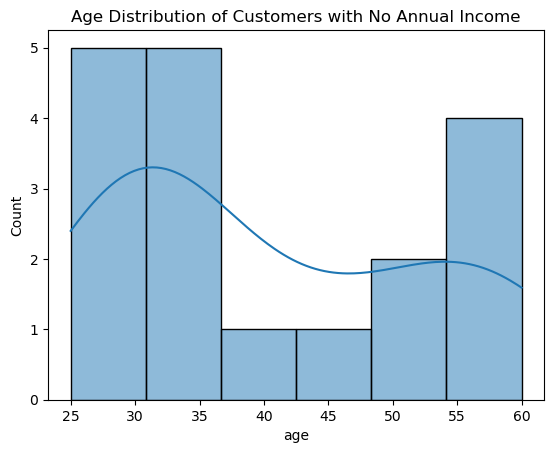

In [20]:
sns.histplot(no_income_customers['age'], kde=True)
plt.title('Age Distribution of Customers with No Annual Income')
plt.show()

# Loan-less Customers Profile

In [21]:
# Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession

In [22]:
# Balance column contain the some non integer values , I have created function to convert non numeric values to 0

In [23]:
data['balance'].fillna(0, inplace=True) 

In [24]:
def to_numeric(val):
    try:
        return pd.to_numeric(val)
    except ValueError:
        return 0

data['balance'] = data['balance'].apply(to_numeric)

data['balance'] = data['balance'].fillna(0)

In [25]:
data = data.dropna(subset=['job'])

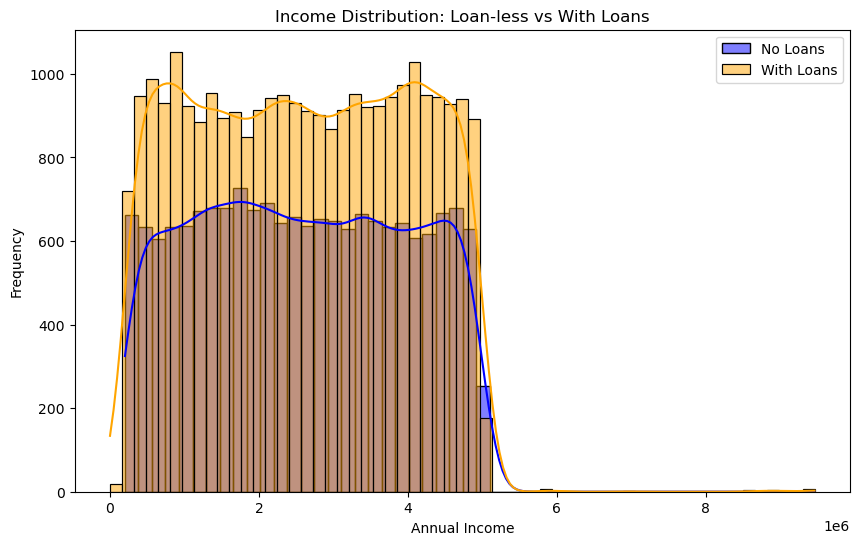

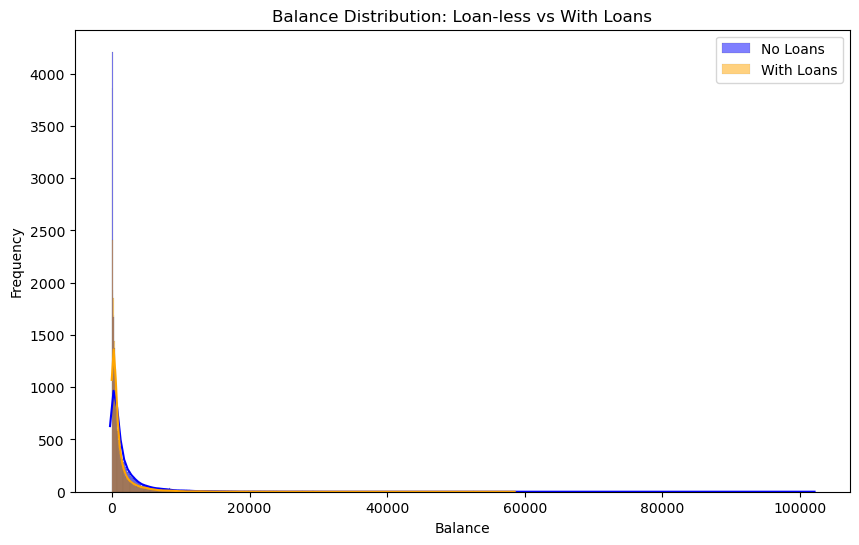

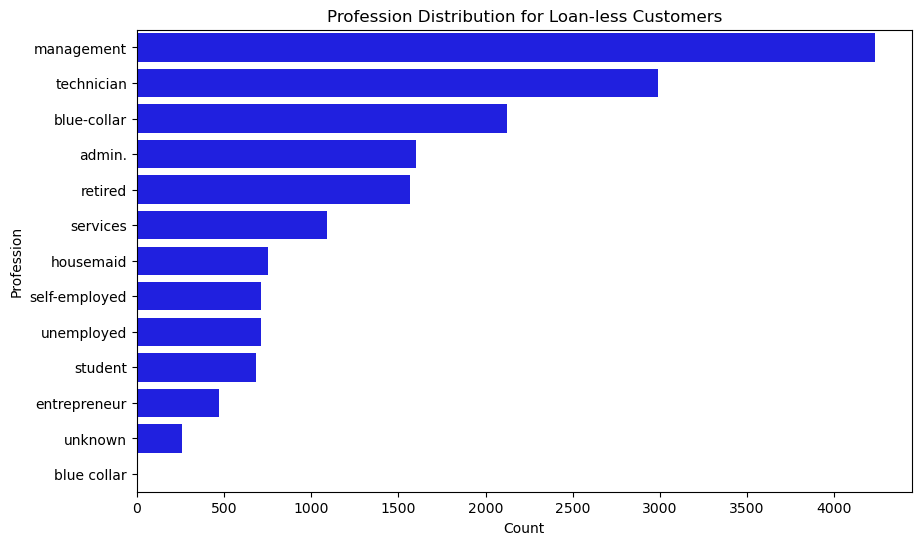

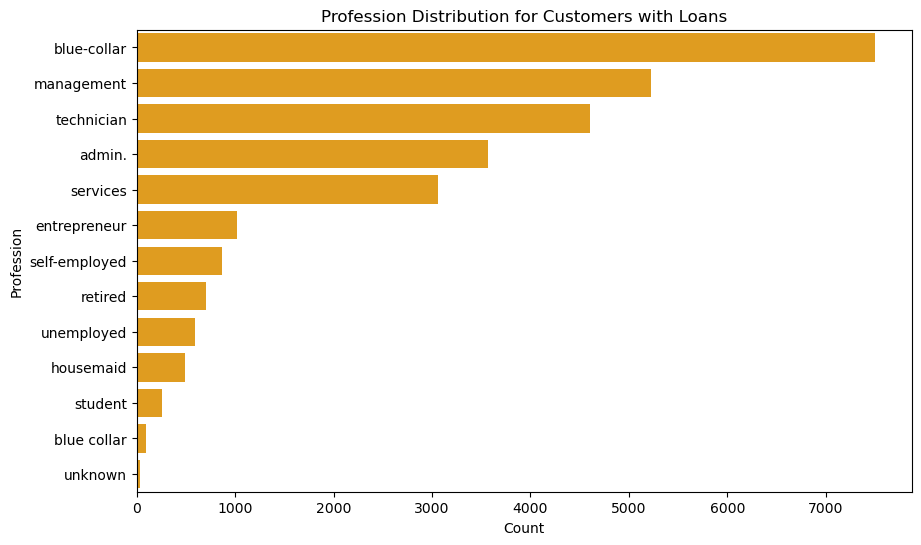

In [26]:
loan_less_customers = data[(data['housing'] == 'no') & (data['loan'] == 'no')]
loan_customers = data[(data['housing'] == 'yes') | (data['loan'] == 'yes')]


# distribution of Income, Balance, and Profession for loan-less customers

# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_less_customers['Annual Income'], kde=True, color='blue', label='No Loans')
sns.histplot(loan_customers['Annual Income'], kde=True, color='orange', label='With Loans')
plt.title('Income Distribution: Loan-less vs With Loans')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_less_customers['balance'], kde=True, color='blue', label='No Loans')
sns.histplot(loan_customers['balance'], kde=True, color='orange', label='With Loans')
plt.title('Balance Distribution: Loan-less vs With Loans')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Profession Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=loan_less_customers, order=loan_less_customers['job'].value_counts().index, color='blue', label='No Loans')
plt.title('Profession Distribution for Loan-less Customers')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()

# Compare Profession distribution between loan-less and loan customers
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=loan_customers, order=loan_customers['job'].value_counts().index, color='orange', label='With Loans')
plt.title('Profession Distribution for Customers with Loans')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()

In [27]:
print(f"Total number of loan-less customers: {len(loan_less_customers)}")

Total number of loan-less customers: 17201


# Loan and Insurance Analysis:

In [28]:
# Calculate the percentage of customers with a loan who have taken out insurance. 

In [29]:
loan_with_insurance = loan_customers[loan_customers['Insurance'] == 'yes']
percentage_insured = len(loan_with_insurance) / len(loan_customers) * 100
print(f'Percentage of customers with loans who have insurance: {percentage_insured:.2f}%')

Percentage of customers with loans who have insurance: 2.15%


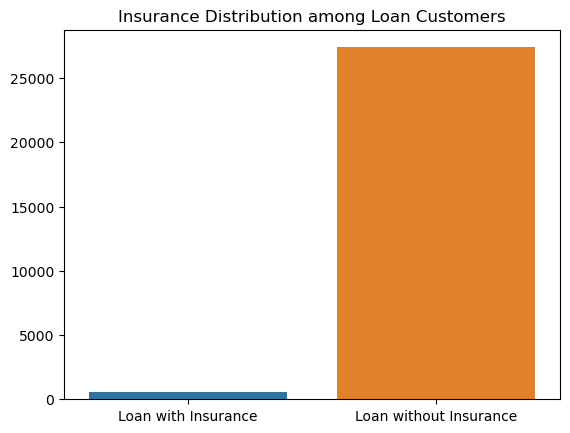

In [30]:
sns.barplot(x=['Loan with Insurance', 'Loan without Insurance'], 
            y=[len(loan_with_insurance), len(loan_customers) - len(loan_with_insurance)])
plt.title('Insurance Distribution among Loan Customers')
plt.show()

# Communication Strategy Insights:

In [31]:
# Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions

In [34]:
# contact contain some null values and some ? , so i filled this with Unknown.
# Encoded the term deposite column using label_encoder

In [35]:
data['contact'].fillna('contact', inplace=True) 
data['contact'].isnull().sum()

0

In [36]:

data['contact'] = data['contact'].replace('?', 'unknown')


In [38]:
a = data['contact'].value_counts()

print(a)


cellular     29280
unknown      12976
telephone     2850
contact         43
Mobile          29
Tel             20
Name: contact, dtype: int64


In [39]:
label_encoder = LabelEncoder()
data['Term Deposit'] = label_encoder.fit_transform(data['Term Deposit'])

In [40]:
contact_success_rate = data.groupby('contact')['Term Deposit'].mean().sort_values(ascending=False)
print(contact_success_rate)

contact
Tel          0.550000
cellular     0.149180
telephone    0.132632
contact      0.093023
unknown      0.041769
Mobile       0.000000
Name: Term Deposit, dtype: float64


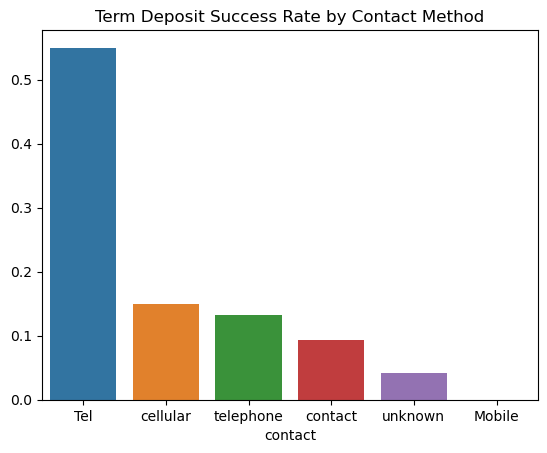

In [41]:
sns.barplot(x=contact_success_rate.index, y=contact_success_rate.values)
plt.title('Term Deposit Success Rate by Contact Method')
plt.show()

# Age and Home Loans:

In [42]:
# Determine which age group has the highest percentage of home loans

In [43]:
# created new column age_group 

age_group
18-30    57.710946
31-40    63.501131
41-50    56.767821
51-60    41.946683
60+       6.881533
Name: housing, dtype: float64


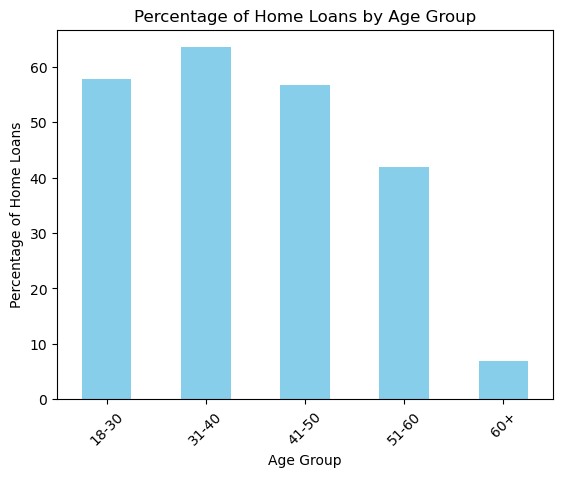

In [44]:
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

home_loan_age_group = data.groupby('age_group')['housing'].apply(lambda x: (x == 'yes').mean() * 100)


print(home_loan_age_group)


home_loan_age_group.plot(kind='bar', color='skyblue')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Home Loans')
plt.xticks(rotation=45)
plt.show()

# Income and Age Relationship:

In [45]:
# Investigate any relationships between annual income and age group

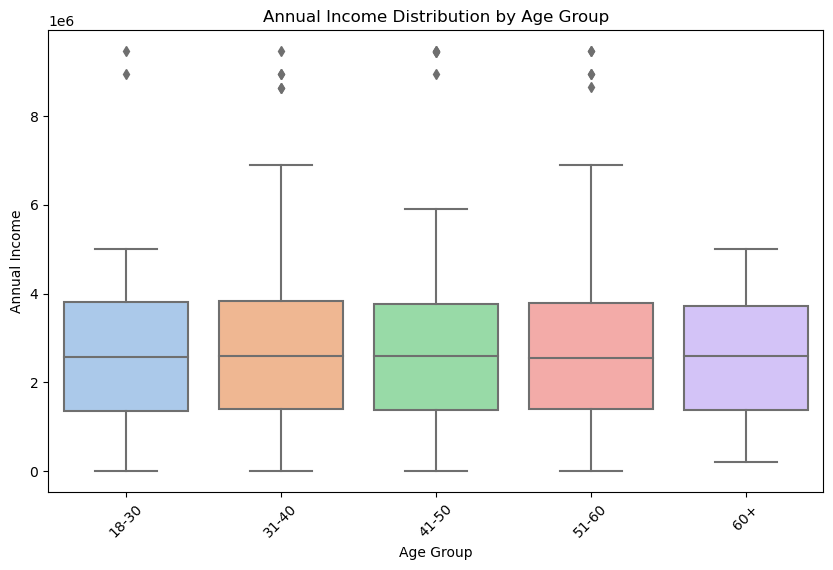

                   mean     median
age_group                         
18-30      2.587376e+06  2578169.5
31-40      2.605910e+06  2599774.5
41-50      2.585121e+06  2588200.0
51-60      2.597968e+06  2558263.0
60+        2.573973e+06  2593432.5
Correlation between Age and Annual Income: 0.00


In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='Annual Income', data=data, palette='pastel')
plt.title('Annual Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()


income_by_age_group = data.groupby('age_group')['Annual Income'].agg(['mean', 'median'])
print(income_by_age_group)

correlation = data['age'].corr(data['Annual Income'])
print(f"Correlation between Age and Annual Income: {correlation:.2f}")


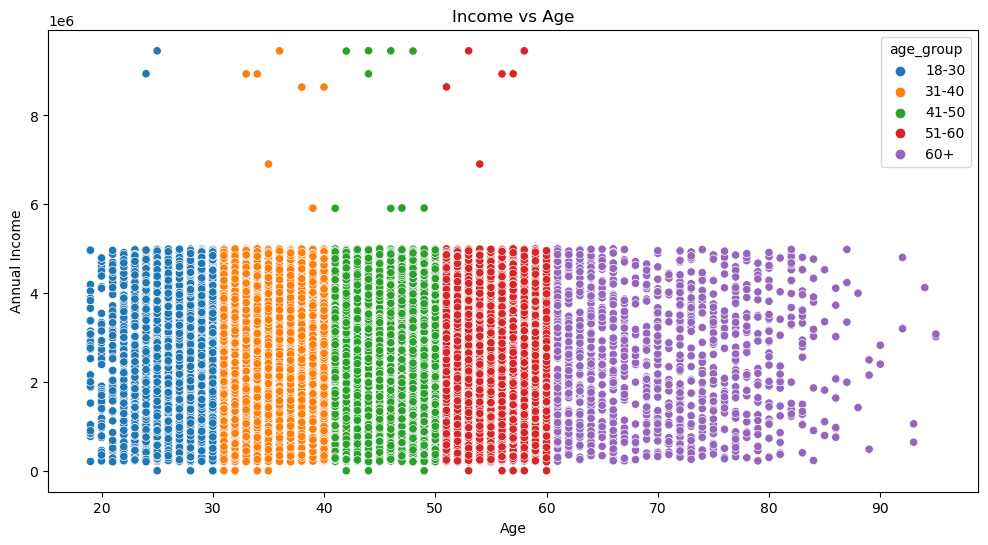

In [49]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='Annual Income', data=data, hue='age_group')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

# Feature Engineering 

In [52]:
data.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,...,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age_group
0,1001,58,management,married,tertiary,839368.0,M,0,no,2143,...,no,contact,261.0,1,2,0,unknown,0,351.0,51-60
1,1002,44,technician,single,secondary,1452858.0,M,1,no,29,...,no,unknown,151.0,1,2,0,unknown,0,326.0,41-50
2,1003,33,entrepreneur,married,NaN,4851383.0,F,2,no,2,...,yes,unknown,76.0,1,2,0,NaN,0,422.0,31-40
3,1004,47,blue collar,married,unknown,3207754.0,F,3,no,1506,...,no,unknown,92.0,1,2,0,unknown,0,113.0,41-50
4,1005,33,unknown,single,unknown,2562322.0,M,4,no,1,...,no,unknown,198.0,1,2,0,unknown,0,342.0,31-40


In [53]:
# Dropped some unimportant columns

data = data.drop(['Customer_number','Sno','last_contact_day','previous','poutcome','age_group'],axis = 1)

In [54]:
# Filled Null values

data['education'].fillna('Nan', inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace=True)
data['Count_Txn'].fillna(data['Count_Txn'].mean(), inplace=True)

In [55]:
# Removed Null values

data = data.dropna()

In [56]:
# Coverted categorical variables into numerical using label encoder.


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['job'] = label_encoder.fit_transform(data['job'])
data['marital'] = label_encoder.fit_transform(data['marital'])
data['education'] = label_encoder.fit_transform(data['education'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Insurance'] = label_encoder.fit_transform(data['Insurance'])
data['housing'] = label_encoder.fit_transform(data['housing'])
data['loan'] = label_encoder.fit_transform(data['loan'])
data['contact'] = label_encoder.fit_transform(data['contact'])

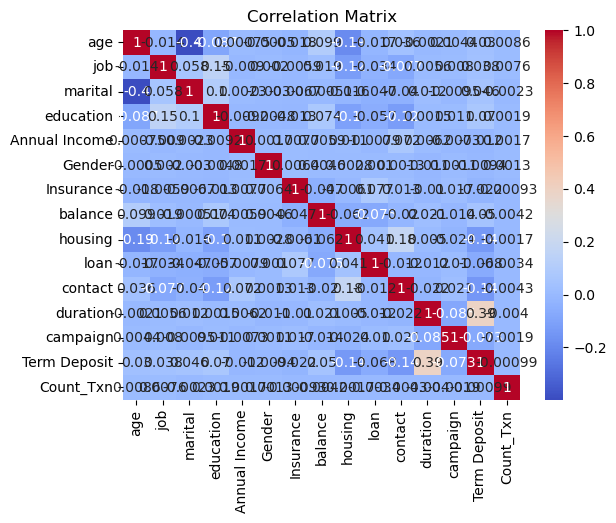

In [57]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
correlation_matrix = data.corr()

print(correlation_matrix['Term Deposit'].sort_values(ascending=False))

Term Deposit     1.000000
duration         0.392001
education        0.069543
balance          0.049514
marital          0.046115
job              0.038292
age              0.029694
Count_Txn       -0.000989
Gender          -0.009412
Annual Income   -0.011831
Insurance       -0.022437
loan            -0.068374
campaign        -0.072984
housing         -0.137761
contact         -0.143633
Name: Term Deposit, dtype: float64


In [186]:
from sklearn.preprocessing import StandardScaler


#scaler = StandardScaler()

#data = scaler.fit_transform(data)

# Model Building

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [188]:
x = data.drop(['Term Deposit'],axis= 1)
y = data['Term Deposit']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [189]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [191]:
model=LogisticRegression()

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.8883969338904724
Test Accuracy: 0.8929717764250138


In [192]:
model2 = KNeighborsClassifier(n_neighbors=5)

model2.fit(x_train, y_train)

y_train_pred = model2.predict(x_train)
y_test_pred = model2.predict(x_test)

print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.909677062290727
Test Accuracy: 0.8869950193691201


In [55]:
model3 = SVC(kernel='linear') 

model3.fit(x_train, y_train)

y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.8827921898335085
Test Accuracy: 0.883075221238938


In [56]:
model4 = RandomForestClassifier(n_estimators=100, random_state=42)

model4.fit(x_train, y_train)

y_train_pred = model4.predict(x_train)
y_test_pred = model4.predict(x_test)

print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.9999723436030754
Test Accuracy: 0.8814159292035398


Train Accuracy: 0.9999723436030754
Test Accuracy: 0.8814159292035398
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31920
           1       1.00      1.00      1.00      4231
           2       1.00      1.00      1.00         7

    accuracy                           1.00     36158
   macro avg       1.00      1.00      1.00     36158
weighted avg       1.00      1.00      1.00     36158

Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7983
           1       0.44      0.05      0.09      1056
           2       0.00      0.00      0.00         1

    accuracy                           0.88      9040
   macro avg       0.44      0.35      0.34      9040
weighted avg       0.83      0.88      0.84      9040



C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


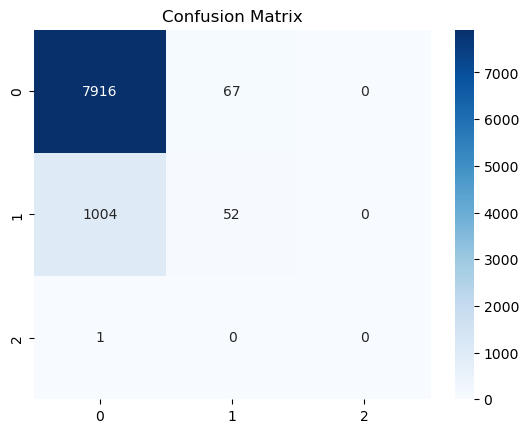

In [57]:
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))

print('Train Classification Report:\n', classification_report(y_train, y_train_pred))
print('Test Classification Report:\n', classification_report(y_test, y_test_pred))

conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Model Improvement Strategies